In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

***Hypothesis Testing***: Let’s talk about 
- t-tests, 
- p-values. 
- How are they related? 
- What is it telling you? 
- How does it relate to precision-recall? 
- What are the underlying assumptions? 

# Build up the foundation

## Mean (expected value)

Suppose we have a random variable $X$. Let $x_1, x_2 , \cdots ,x_n$, be all the possible outcomes of $X$.

**Expected value** of $X$, or its average, is defined by $E[X] = \mu = \sum p_i x_i$ where $p_i$ is probability of observing $x_i$. That is the center of the distribution.

The random variable $X$ has another characteristic called variance, which measures how far $x_i$'s are spread out around the mean $\mu$.

In practice, we will not know what the distribution of $X$ is. Hence, we do not know what $\mu$ and variance of $X$ are. In practice we just have a sample set of $X$, we just have observed occurence of some of the possible outputs of $X$. What can we do?

We take the observed values and use them to **estimate** $\mu$ and $\sigma^2$. If we have a set of randomly seen observqations of a random variable $X$, $A_1 = \{x_1, \: x_2, \cdots, \: x_k\}$, we use its arithmetic average to estimate $\mu$.

#### Facts about expected values

Now consider a continuous distribution $X$ and suppose we have a bunch of sample sets of observed values of $X$, 


$$A_1 =\{x_{11},\:  x_{21}, \cdots, \: x_{k1}\}$$

$$A_2 =\{x_{12}, \: x_{22}, \cdots, \: x_{k2}\}$$


$$\vdots$$ 

$$A_m =\{x_{1m}, \: x_{2m}, \cdots, \: x_{km}\}$$

And for each $A_i$ we compute arithmetic averages of elements in it, i.e. 

$$\bar{X}_j = \sum_{i=1}^{k}x_{ij} \tag{1}$$

These averages are function of random variables $x_i$, therefore, **the average of random variable is itself a random variable**. Hence, it has an expected value and a variance. The center of this distribution is the same as that of the original distribution $X$.

**$$E[\bar{X}] = \mu \tag{important fact 2}$$**

**The equation above is said to be unbiased, since its distribution is centered at what it is trying to estimate.**

EFY \[Excersice For You\]: show the above equation is true!

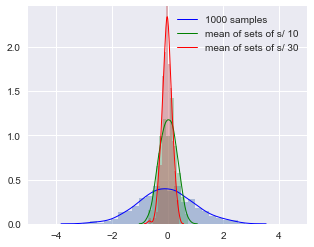

In [74]:
## Randomly choose 1000 samples from N(0,1)
##
np.random.seed(0) # set the seed to get the same result everytime!
sample = np.random.normal(loc=0, scale=1, size=1000)

mean10 = [0]*200
mean30 = [0]*200
for count in range(200):
    sample10 = np.random.normal(loc=0, scale=1, size=10)
    mean10[count] = np.mean(sample10)
    
    sample30 = np.random.normal(loc=0, scale=1, size=30)
    mean30[count] = np.mean(sample30)


fig, ax = plt.subplots()
sb.distplot(sample, kde_kws={"color": "b", "lw": 1, "label": "1000 samples"})
sb.distplot(mean10, kde_kws={"color": "g", "lw": 1, "label": "mean of sets of s/ 10"})
sb.distplot(mean30, kde_kws={"color": "r", "lw": 1, "label": "mean of sets of s/ 30"})
ax.set_xlim([-5, 5])
plt.show()

In the plot above 

1. the ** <font color='blue'>blue</font>** diagram is histogram of 1000 randomly chosen samples from normal distribution $N(0,1)$.
2. The ** <font color='green'>green</font>** diagram is histogram of arithmetic averages of 200 samples $A_i$ where each sample is of size 10.
3. The ** <font color='red'>red</font>** diagram is histogram of arithmetic averages of 200 samples $A_i$ where each sample is of size 30.


We can see 

- The distribution of $A=\{x_1, \cdots, x_{1000}\}$ is a good estimate of the normal distribution. The larger the sample set the better.

- Arithmetic mean of $A$ is a good estimate of true mean $\mu=0$ of the normal distribution.

- We can also see that the arithmetic mean of $A_i$'s are also centered at 0, for both sample sizes of 10 and 30.

- On observant reader also notices that the larger the $|A_i|$'s are, the more the sample means are concenterated arount 0,. i.e. as cardinality of sample sets increases, the variance of mean distribution decreases. This means the more data we have, the more accuratrely we can estimate the parameter we want to estimate, surprise!

## Variance

Measure of spread of a random variable is called variance, it tells us how the random variable is spreat out around the mean

$$\sigma^2 = Var(X) = E[(X-\mu)^2] = E[X^2] - E[X]^2 \tag{3}$$

$\sigma$ is called standard deviation.

The smaller the variance, the more concentrated are the samples around the mean:

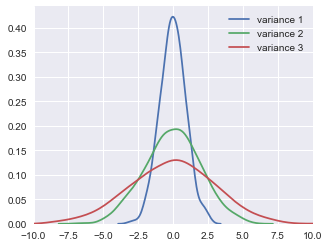

In [73]:
mu = 0
np.random.seed(10) # set the seed to get the same result everytime!

sample1 = np.random.normal(loc=mu, scale=1, size=1000)
sample2 = np.random.normal(loc=mu, scale=2, size=1000)
sample3 = np.random.normal(loc=mu, scale=3, size=1000)
fig, ax = plt.subplots()
sb.kdeplot(sample1, label="variance 1")
sb.kdeplot(sample2, label="variance 2")
sb.distplot(sample3, hist=False, label="variance 3")
ax.set_xlim([-10, 10])
plt.show()


Recall: 
    - Populaiton mean is the center of the mass of population.
    - Sample mean is center of mass of the observed data.

Similarly:
The variance of a sample set $A=\{x_1, \cdots, x_n\}$ is used to estimate $\sigma^2$ and is given by:

$$ S^2 = \frac{\sum_{i=1}^2(x_i - \bar{x})}{n-1} \tag{4} $$

This sample variace $S^2$ is a function of random variables. Therefore, $S^2$ itself is a random variable and it has a (population) distribution. The distribution of $S^2$ has a mean and a variance.

The expected value of "sample variance $S^2$" is, of course, the same as $Var(X)$. We use $S^2$ to estimate $\sigma^2$, of course expected value of $S^2$ has to be the same as $\sigma^2$.

$$E[S^2] = \sigma^2 \tag{5}$$

#### Facts about sample means:

- $E[\bar{X}] = \mu$
- $Var(\bar{X}) = \frac{\sigma^2}{n}$ ( This was observed in the first plot above. Prove it!) This is useful, since we only get **one** sample set like $A_1$, we do not get lots of them like the experiment we did above: $A_1, \cdots, A_{200}$. This quantity is very important and its root has its own name, Standard Error of the mean denoted by $SE(\bar{X})$.

In summary:

- $E[\bar{X}] = \mu$


- $Var(\bar{X}) = \frac{\sigma^2}{n}$ where $n$ is the number of observed variables. We do not know $\sigma^2$, therefore, we use its estimate $Var(\bar{X}) = \frac{S^2}{n}$.


- $SE(\bar{X}) = \frac{S}{\sqrt{n}}$. $S$ Talks about how variable the population is, $SE$ talks about how variable  averages of random samples of size $n$ are.

<h1><center>Prepare the scene to see how hypothesis test works</center></h1>

### Prepare the scene to see how hypothesis test works.

# Central Limit Theorem:

The following random variable will tend to have a standard normal distribution as $n$ increases.

$$\dfrac{\bar{X}_n - \mu}{\dfrac{\sigma}{\sqrt{n}}} \tag{6}$$

Or, equivalently, $\bar{X}_n \sim N\big(\mu, \dfrac{\sigma^2}{{n}}\big)$.


### Confidence Interval
$\bar{X}$ is approximately normal with mean $\mu$ and sd $\dfrac{\sigma}{\sqrt{n}}$.

The probability that $\bar{X}$ is larger than $\mu + \dfrac{2\sigma}{\sqrt{n}}$ or smaller than $\mu-\dfrac{2\sigma} {\sqrt{n}}$ is 5%, or equivalently the **probbaility** that $\mu$ is between these limits is 95%.

$ \bar{X} \pm \dfrac{2\sigma}{\sqrt{n}}$ is called a 95% interval for $\mu$. Here $\mu$ is **<font color='red'>fixed</font>** and the interval is being random. So, we are saying **the probability of this interval containig $\mu$ is 95%**. Another words, if repeatedly get samples of size $n$ from this population, construct a confidence interval in each case, about 95% of the intervals we obtain would contain $\mu$.

<img src='normal-distribution-curves.png' style="width:325px;height:200px;"\tag{10}> 

If in Eq. (6) we replace $\sigma$ with $S$ we get a t-distribution. When we use this to compute a confidence interval, then we get T confidence interval, $ \bar{X} \pm t_{n-1}\sigma/\sqrt{n}$, where $n$ is the number of samples we have, and $n-1$ is called degrees of freedom of t-distribution. As n increases the t-distribution tends to get closer to normal distribution.

### Why we defined confidence interval above?

Let's say I have a dream about mean of random variable distribution, and in the morning I claim $\mu=10$. A friend of mine looks at the data and says ''You are an idiot, the mean cannot be less than 15''.

In order to not embarrass myself, I decide to do a test. I use central limit theorem, to see to what extend I can be sure that my guess, 10, is close to the true mean of distribution $\mu$.

Here in this scenario my original assumption where I did not have any proof for, is called the so called ***null hypothesis***.

$$H_0: \mu=10 \tag{7 - null hypothesis}$$

My friend's statement is an alternative to my statement, it is called alternative hypothesis.

$$H_a: \mu>15 \tag{8 - alternative hypothesis}$$


There is nothing special about 10, or 15 or greater than! The alternative hypothesis could be $H_a:\mu \ne 10$.

Lets see what I can do. hummm, I do not have $\mu$, the only thing I have is a sample set of an unknown distribution. However, I can use the Central Limit Theorem (CLT). It says averages will have a distribution close to normal distribution. (t-distribution).

There are 4 possible cases:

- $H_0$ is true and I accept it. (correctly accept null)
- $H_0$ is true and I falsely reject it. (Type I error)
- $H_a$ is true and I accept it. (correctly reject null)
- $H_a$ is true and I falselye go with $H_0$. (Type II error)

I decide to give up on my claim, i.e. reject null hypothesis, if $\bar{X}$ is greater than some number C, for e.g. 12.

So, my strategy would be to reject $H_0$ if the probability of ''Type I error'' is 5% or less.

$$P(\text{rejecting}\: H_0\: |\: H_0) = .05$$


Assuming my claim $H_0$ is true, CLT says $\bar{X} \sim N\big(10, \dfrac{\sigma}{\sqrt{n}}\big)$. We do not know $\sigma$, we have to estimate it with $s$ given by Eq. (4) above. Lets say our sample set has 100 elements in it, and $s=10$. Therefore, $\bar{X} \sim N(10, 1)$. 


Now, I want to choose C so that $P(\text{rejecting}\: H_0\: ; \: H_0) = P(\bar{X}>C \: ; \: H_0) = 0.05$. We all have seen the image below:

<img src='95th.jpg' style="width:325px;height:200px;"\tag{10}> 

The 95th percentile of normal distribution is $1.645 \sigma$ away from the mean. So, there is at most 5% chance that $\bar{X}$ is greater than $C=10+1.645 \times 1 = 10.1645$. Now, I can compute $\bar{X}$ and decide what to do!

-----------------------

- Usually we do not compute C. We just look at the t-score, $z = \dfrac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$. In this example if $z > 1.645$, we reject the null hypothesis.

- If in Eq. (6) we replace $\sigma$ with $S$, then $t = \dfrac{\bar{X} - \mu}{SE(\bar{X})}$ is called t-statistic ot t-score. And (n-1) is called degrees of freedom of the t-distribution.

- Usually, the alternative hypothesis is not one sided, it is two sided, and therefore we work with confidence intervals. In example above $H_a: \mu \ne 10$ is a two sided alternative hypothesis, and again, we want to reject the null hypothesis with $P(\text{rejecting}\: H_0\: ; \: H_0) = 0.05$. In this case, 2.5% of the probablitiles are on the left end, i.e. if the sample mean is too small, and 2.5% of the probabilitues are at the right end, when the sample mean is too large. Hence, instead of looking at 95th percentile we look at 97.5th percentile from above and 2.5th percentile from below. And the interval 

$$\big[\bar{X} - t \: \dot{} \:  SE(\bar{X}) \: , \:\bar{X}+ t \:  \dot{} \: SE(\bar{X})\big]$$ 

would be the confidence interval we are looking for. In order to reject the null hypothesis with type I error rate of 5%, the confidence iterval *approximately* takes the form of 

$$\big[\bar{X} - 2 \:\dot{} \:SE(\bar{X}) \: , \: \bar{X}+ 2 \:\dot{} \:SE(\bar{X})\big]$$


This is called the famous **t-test**. And it means with the sample set in hand, we are 95% sure that the true population mean $\mu$ lies in this interval.

The sum of the two probabilities lying outside of the confidence interval, the shaded area below, is called ***p-value***. We compute the t-statistic and we look at the probability of observing a value, $\bar{X}$, that is greater than $|t|$, if it is small we reject the null hypothesis.

<img src='z-score.png' style="width:325px;height:200px;"\tag{10}> 

**Type I error**: Rejecting null hypothesis while it is true.

**The type I error rate** is probability of rejecting null hypothesis given that it is true. It is the same as p-value.

In the context of testing someone for a disease:

Null hypothesis is that "Nothing is there."

Let D be the fact that the person has disease, $D^c$ the person does not have disease.
Let + be the fact that the test result says the person has disease, and - be the fact that the test says the person does not have diasese.

type I error rate = P(Rejecting null hypothesis while it is true) =  P(rejecting $H_0$ | $H_0$)  = P(+ | $D^c$).

1 - type II error rate = Sensitivity = Recall = P(+|D) = P(predicting sth is there | something is there) = $\frac{P(+ \: \cap \: D)}{P(D)} = \frac{TP}{TP + FN}$

#### Assumpstions made here:
- The data are normally distributed. (t-test is a studying distribution of means of sample sets where sample sets are drawn from normally distribited population.)
- Variance of samples are equal.
- When we use normal distribution precentiles rather than t-distribution percentiles, we are assuming number of samples in the sample set is more than 30.

<h1><center>An example of t-test and p-value. Regression.</center></h1>

### An example of t-test and p-value. Regression
The following is written so that it can be good enough on its own.

#### Preface (Motivation)

Assume we have a set of observations, $x_1, x_2, \cdots, x_n$ drawn from an unknown population. We want to estimate mean of population for a random variable we are working with, $X$. what shall we do? One simple way is to do is to calculate the mean of the observations, 

$$\bar{x}= \frac{1}{n}\sum_{i=1}^n x_i \tag{1}$$ 

and claim its the mean of the population, $\mu$.

A natural question to ask is "how accurate is our prediction?".

Lets do an experiment:

In [3]:
np.random.seed(100) # set the seed to get the same result everytime!

mu, sigma= 0.0, 1.0 # set the mean and variance of normal distribution
no_experiments = 4
n=10

for experiment_count in range(no_experiments):
    sample = np.random.normal(loc=mu, scale=sigma, size=n)
    print ('The difference between the true mean and estimated mean is {0:.3f}.'.format(mu - np.mean(sample)))
    

The difference between the true mean and estimated mean is -0.021.
The difference between the true mean and estimated mean is 0.028.
The difference between the true mean and estimated mean is -0.501.
The difference between the true mean and estimated mean is 0.396.


We can see in above example that our estimate of mean depends on the observations we have gotten in hand, of course!

In order to see how accurate our estimate of the mean is we can look at the standard error:

$$ SE(\bar{x}\:\:) = \frac{s}{\sqrt{n}} \tag{2} $$

where $s$ is the sample standard deviation:

$$s = \left(\sum_{i=1}^n \frac{(x_i - \bar{x} \: \:)}{n-1}\right)^{\frac{1}{2}} \tag{3}$$


### Hypothesis Testing

Having the example above in mind, lets look at a linear regression model and explain what is a t-statistics, a p-value and how they relate.

Suppose we have a function defined as follows:
$$ y = f(x) + \epsilon \tag{4} $$

The noise $\epsilon$ is out of our control, we cannot do anything about it. However, we have some data, and we hope to use it to come up with a function $\hat{f(x)}$ to estimate the function $f(x)$, and use it as a proxy to estimate $y$.

Suppose we have a data set. We train a model using a blackbox of Python or by some other means, such as a dream!
Let's say we conclude that our regression model should be:

$$ \hat{y} = \hat{f}(x) = \hat{a}_0 + \hat{a}_1\: x_1 + \hat{a}_2\: x_2 + \cdots + \hat{a}_n \: x_n \tag{5}$$

A series of question rises immediately:

- How much of the information in the training set is described by this model. How accurate are we doing on the training set.
- Is this model generalizable? i.e. would it work well on unseen data?
- and so on.

Well, some part of questions mentioned above can be broken into smaller pieces, for e.g.:

- Is the real underlying rule of the data, i.e. $f(x)$, truely linear? (Is the relation between $y$ and $x_i$) linear?

Ok, I want to draw your attention to a more specific question here. Lets assume the model is a simple linear model. 
Assume 

$$ f(x) =  a_0 + a_1 x_1 + a_2 x_2 + \cdots + a_n x_n \tag{6} $$

The ***question*** is how accurate are the coefficients we found, i.e. how close are $\hat{a}_i$'s to $a_i$'s.

Similar to what we saw in the example in the preface, of course the coefficients we have computed here, depends on the set of observations we have, i.e. the training set.

- So, if we have training set 1, then we would obtain a set of coefficients associated with it $$A^{(1)}=(a_0^{(1)}, a_1^{(1)}, \cdots, a_n^{(1)})$$

- If we had a different training set 2, we would obtain a different set of coefficients $$A^{(2)}=(a_0^{(2)}, a_1^{(2)}, \cdots, a_n^{(2)})$$

so on, so forth.


A natural *question* would be on average how far a given coefficient estimate $\hat{a}_i$ is from the true coefficient $a_i$.

--------------------------------

Lets review a few concepts/definitions and then go back to see how can we decide on the quality of the predicted coefficients.

**Definition 1** In statistics, usually, *null hypothesis*, **$H_0$**, states that there is no relationship between two measured variables, in our case X and Y.

$$H_0: \text{There is no relationship between $X$ and $Y$ }$$

**Definition 2** Alternatie hypothesis is the hypothesis that is contrary to the null hypothesis.

$$H_a: \text{There is a relationship between $X$ and $Y$ }$$

**Definition 3** $Z$-Score is the number of standard deviations that a given data point is away from the population mean, $z = \frac{x-\mu}{\sigma}$.

For simplicity, lets look at simple linear regression model, $y=a_0 + a_1x$. The null hypothesis in this case is $a_1=0$, i.e. there is no relation between $x$ and $y$, and alternative hypothesis is $a_1 \neq 0$. And assume using the training set we have estimated $\hat{a}_1$ to be some number. 

If the null hypothesis is true, which we do not know, then $\hat{a}_1$ should not be far from $0$. 

But how far is far? How far should $\hat{a}_1$ be from zero for us to reject the null hypothesis? This is measured by t-statistics which is similar to Z-score. It tells us how far $\hat{a}_1$ is from 0.

$$ t = \frac{\hat{a}_1 - 0}{SE(\hat{a}_1)} \tag{7}$$

When the null hypothesis is true, the t-statistics given by Eq. (7) will have a t-distribution. For large $n$, the t-distribution looks like normal distribution.

A large t-statistics means our estimated coefficient is too far from 0 which is assumption of null hypothesis, so, we can reject the null hypothesis.

Having a t-statistics we can compute the probability of observing a coefficient value greater than or equal to $\left|t\right|$. This probability is called *p-value*. The larger the magnitude of $t$, the smaller the *p-value*.

<img src='z-score.png' style="width:325px;height:200px;"\tag{10}> 

A small *p-value* means that probability of observing such a (relatively) big value for $\hat{a}_{\:1}$ is low, if $a_{1}=0$. Therefore, if *p-value* is small we reject the null-hypothesis and conclude that there **is** a relationship between $X$ and $Y$.

You should notice what is told above: we have assumed:

- average of $\hat{a}_1\: \: ^{(j)}$'s obtained by different training sets is zero, i.e. $a_1=0$ which came from the null hypothesis.
- The data are normally distributed. (t-test is a studying distribution of means of sample sets where sample sets are drawn from normally distribited population.)
- Variance of samples are equal.
- When we use normal distribution precentiles rather than t-distribution percentiles, we are assuming number of samples in the sample set is more than 30.